## A linear classifier in pure TensorFlow

In [1]:
import tensorflow as tf
import numpy as np

2022-09-29 04:42:11.435072: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 04:42:25.334993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-29 04:42:25.335483: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-09-29 04:42:25.335546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
#Generating two classes of random points in a 2D plane
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [3]:
#Stacking the two classes into an array with shape (2000, 2)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)


In [4]:
#Generating the corresponding targets (0 and 1)


targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))


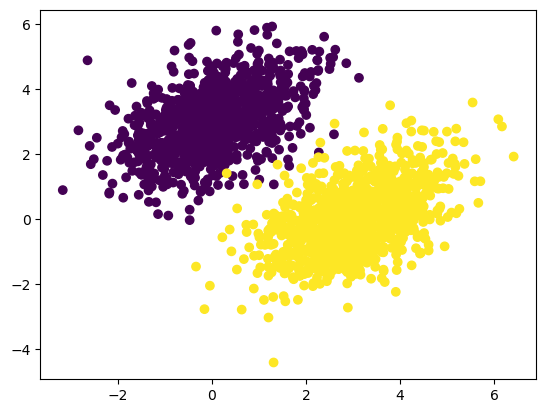

In [5]:
#Plotting the two point classes 
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [8]:
#Creating the linear classifier variables
input_dim = 2
output_dim = 1

w = tf.Variable(initial_value=tf.random.uniform((input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros((output_dim)))

In [10]:
#The forward pass function
def model(inputs):
    return tf.matmul(inputs, w) + b

#prediction = [[w1], [w2]] • [x,
#y] + b = w1 * x + w2 * y + b.

In [11]:
#The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [13]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w, b])
    w.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [16]:
#The batch training loop
epochs = 40
for step in range(epochs):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step} : {loss:.4f}")

Loss at step 0 : 0.0294
Loss at step 1 : 0.0291
Loss at step 2 : 0.0288
Loss at step 3 : 0.0286
Loss at step 4 : 0.0284
Loss at step 5 : 0.0282
Loss at step 6 : 0.0280
Loss at step 7 : 0.0278
Loss at step 8 : 0.0276
Loss at step 9 : 0.0275
Loss at step 10 : 0.0273
Loss at step 11 : 0.0272
Loss at step 12 : 0.0271
Loss at step 13 : 0.0270
Loss at step 14 : 0.0269
Loss at step 15 : 0.0268
Loss at step 16 : 0.0267
Loss at step 17 : 0.0267
Loss at step 18 : 0.0266
Loss at step 19 : 0.0265
Loss at step 20 : 0.0265
Loss at step 21 : 0.0264
Loss at step 22 : 0.0264
Loss at step 23 : 0.0263
Loss at step 24 : 0.0263
Loss at step 25 : 0.0263
Loss at step 26 : 0.0262
Loss at step 27 : 0.0262
Loss at step 28 : 0.0262
Loss at step 29 : 0.0262
Loss at step 30 : 0.0261
Loss at step 31 : 0.0261
Loss at step 32 : 0.0261
Loss at step 33 : 0.0261
Loss at step 34 : 0.0261
Loss at step 35 : 0.0260
Loss at step 36 : 0.0260
Loss at step 37 : 0.0260
Loss at step 38 : 0.0260
Loss at step 39 : 0.0260


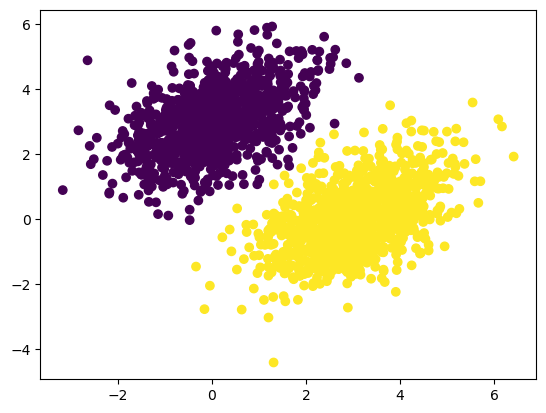

In [17]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [ ]:
#Recall that the prediction value for a given point [x, y] is simply prediction ==
#[[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b


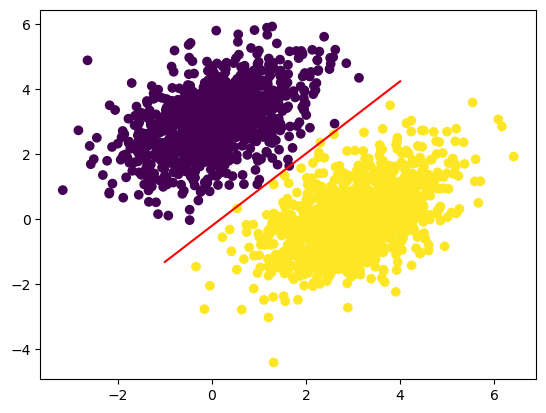

In [20]:
x = np.linspace(-1, 4, 100)
y = - w[0] / w[1] * x + (0.5 - b) / w[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)